In [388]:
# Packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import squarify

In [289]:
# Print more rows and columns of pandas.DataFrame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [288]:
# Change path if needed
path = r'C:\Users\user\Desktop\KUL - Mstat\Big Data Platforms and Technologies\project'
data = pd.read_csv(path + r'\ctrain.csv')

### **<font color='blue'>Exploratory Data Analysis (EDA)</font>**

 **<font color='blue'>Dependent variable: Fraud</font>**

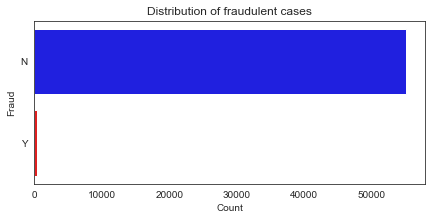

In [338]:
# Countplot for Fraud
sns.set_style('white')
ax = sns.countplot(y = 'fraud', data = data, palette = ['blue', 'red'])
ax.set_title('Distribution of fraudulent cases')
ax.set_xlabel('Count')
ax.set_ylabel('Fraud')
fig = ax.get_figure()
fig.set_size_inches(7, 3)
fig.savefig('class_imbal_problem.png', bbox_inches='tight', dpi = 300)

In [67]:
# Statistics
data['fraud'].value_counts()

N    55155
Y      308
Name: fraud, dtype: int64

 **<font color='blue'>Weighting variable: claim_amount</font>**

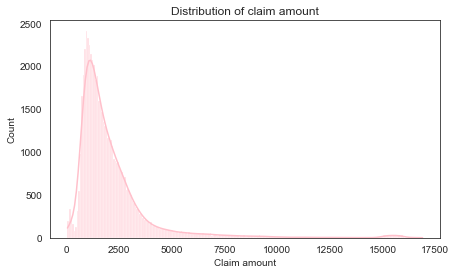

In [334]:
# histogram for claim_amount
sns.set_style('white')
ax = sns.histplot(x = 'claim_amount', data = data, kde = True, color = 'pink')
ax.set_title('Distribution of claim amount')
ax.set_xlabel('Claim amount')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_claim_amount.png', bbox_inches = 'tight', dpi = 300)

         count         mean          std    min        25%       50%  \
fraud                                                                  
N      55155.0  2085.272692  1875.893851  30.00  1060.1050  1577.630   
Y        308.0  6556.037792  6017.175534  43.32  1627.3575  3201.655   

             75%      max  
fraud                      
N       2442.205  16000.0  
Y      13641.435  16901.0  


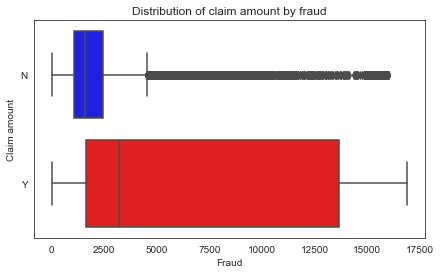

In [336]:
# Distribution of claim amount by fraud
print(data.groupby('fraud')['claim_amount'].describe())

# Visualization in a boxplot
ax = sns.boxplot(y = 'fraud', x = 'claim_amount', data = data, palette = ['blue', 'red'])
ax.set_title('Distribution of claim amount by fraud')
ax.set_xlabel('Fraud')
ax.set_ylabel('Claim amount')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_claim_amount_by_fraud.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>Number of third party involved</font>**

count    55463.000000
mean         0.831419
std          0.580161
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: claim_num_third_parties, dtype: float64
1    38293
0    13702
2     2767
3      546
4      127
5       28
Name: claim_num_third_parties, dtype: int64
fraud                           N         Y
claim_num_third_parties                    
0                        0.245200  0.577922
1                        0.692086  0.392857
2                        0.050077  0.016234
3                        0.009863  0.006494
4                        0.002266  0.006494
5                        0.000508  0.000000


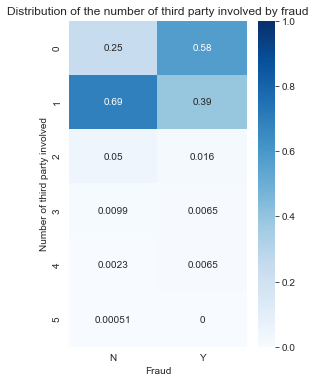

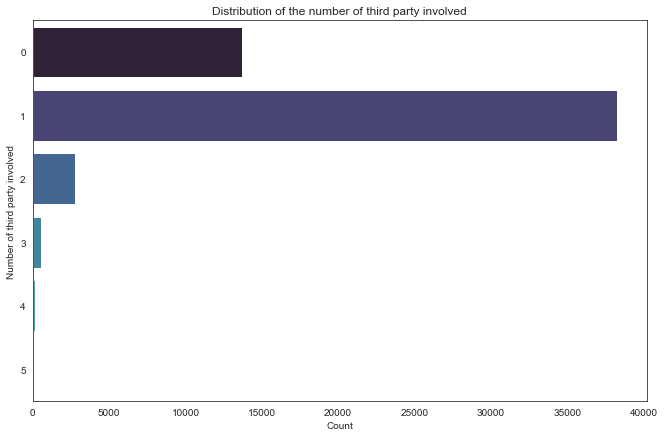

In [357]:
# Distribution of the number of third party involved
print(data['claim_num_third_parties'].describe())
print(data['claim_num_third_parties'].value_counts())

# Distribution by fraud
tab = pd.crosstab(data['claim_num_third_parties'], data['fraud'], 
                  normalize = 'columns')
print(tab)
sns.set_style('white')
ax = sns.heatmap(tab, cmap = 'Blues', vmin = 0, vmax = 1, annot = True)
ax.set_xlabel('Fraud')
ax.set_ylabel('Number of third party involved')
ax.set_title('Distribution of the number of third party involved by fraud')
fig = ax.get_figure()
fig.set_size_inches(4, 6)
plt.show()
fig.savefig('num_third_party_involved_by_fraud.png', bbox_inches = 'tight', dpi = 300)

# Visualization in a barplot
sns.set_style('white')
ax = sns.countplot(y = 'claim_num_third_parties', data = data, palette = 'mako')
ax.set_title('Distribution of the number of third party involved')
ax.set_xlabel('Count')
ax.set_ylabel('Number of third party involved')
fig = ax.get_figure()
plt.show()
fig.savefig('num_third_party_involved.png', bbox_inches = 'tight', dpi = 300)

                        claim_amount              
fraud                              N             Y
claim_num_third_parties                           
0                        2062.943841   8340.047809
1                        1902.943303   3641.121157
2                        3817.006499  12914.904000
3                        5339.231415   2503.950000
4                        6565.404160  12286.525000
5                        7393.631786      0.000000


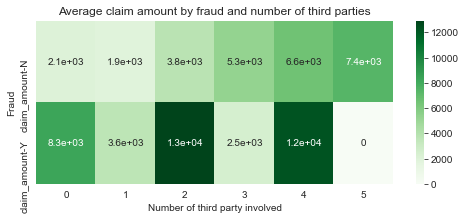

In [371]:
tab = data.pivot_table(index = ['claim_num_third_parties'], columns = ['fraud'], values = ['claim_amount'], 
                       aggfunc = 'mean', fill_value = 0)
print(tab)
sns.set_style('white')
ax = sns.heatmap(tab.T, cmap = 'Greens', annot = True)
ax.set_ylabel('Fraud')
ax.set_xlabel('Number of third party involved')
ax.set_title('Average claim amount by fraud and number of third parties')
fig = ax.get_figure()
fig.set_size_inches(8, 3)
plt.show()
fig.savefig('num_third_party_involved_by_fraud2.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>Vehicle brands</font>**

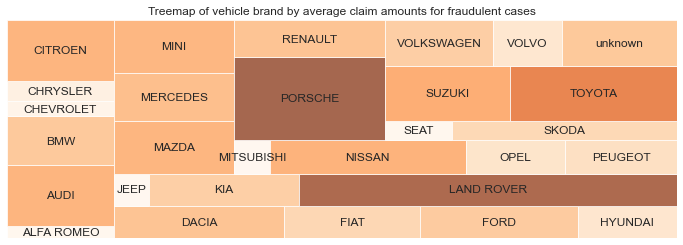

In [455]:
# vehicle brands from fraudulent cases ranked by average claim amounts
tab = data[data['fraud'] == 'Y'].groupby('claim_vehicle_brand')['claim_amount'].mean()
norm = matplotlib.colors.Normalize(vmin = min(tab.values), vmax = max(tab.values))
colors = [matplotlib.cm.Oranges(norm(value)) for value in tab.values]

# treemap
squarify.plot(sizes = tab.values, label = tab.index, alpha = .7, color = colors)
fig = plt.gcf()
fig.set_size_inches(16, 4.5)
plt.axis('off')
plt.title('Treemap of vehicle brand by average claim amounts for fraudulent cases')

fig.set_size_inches(12, 4)
fig.savefig('treemap_vehicle_brand_average_claim_amount.png', bbox_inches = 'tight', dpi = 300)

In [456]:
tab.sort_values(ascending = False)[0:3]

claim_vehicle_brand
PORSCHE       15861.0
LAND ROVER    15328.0
TOYOTA        11640.0
Name: claim_amount, dtype: float64

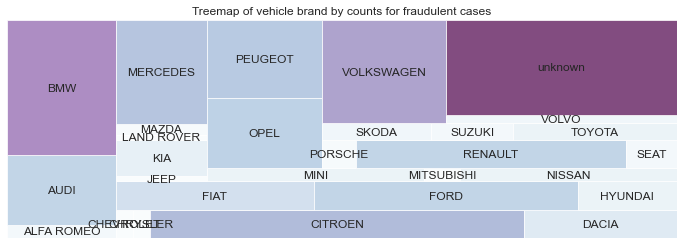

In [457]:
# vehicle brands from fraudulent cases ranked by average claim amounts
tab = data[data['fraud'] == 'Y'].groupby('claim_vehicle_brand')['claim_id'].count()
norm = matplotlib.colors.Normalize(vmin = min(tab.values), vmax = max(tab.values))
colors = [matplotlib.cm.BuPu(norm(value)) for value in tab.values]

# treemap
squarify.plot(sizes = tab.values, label = tab.index, alpha = .7, color = colors)
fig = plt.gcf()
fig.set_size_inches(16, 4.5)
plt.axis('off')
plt.title('Treemap of vehicle brand by counts for fraudulent cases')

fig.set_size_inches(12, 4)
fig.savefig('treemap_vehicle_brand_count.png', bbox_inches = 'tight', dpi = 300)

In [459]:
tab.sort_values(ascending = False)[0:4]

claim_vehicle_brand
unknown       46
BMW           31
VOLKSWAGEN    27
CITROEN       22
Name: claim_id, dtype: int64

 **<font color='blue'>claim_cause</font>**

In [484]:
tab = pd.crosstab(data['fraud'], data['claim_cause'])
tab

claim_cause,animal,fire,other,theft,traffic accident,vandalism,weather,windows
fraud,,,,,,,,
N,334,29,7379,513,43366,198,744,2592
Y,10,10,56,97,130,0,4,1


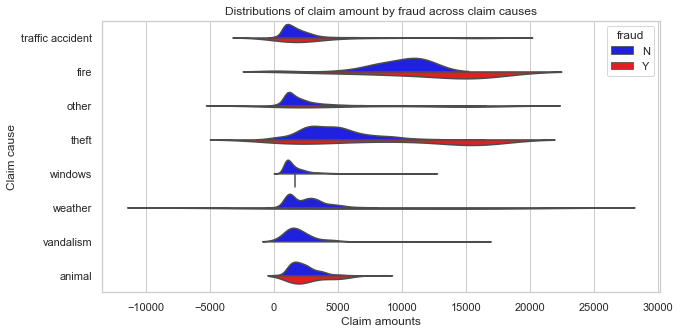

In [502]:
# Claim cause 
ax = sns.violinplot(x = 'claim_amount', y = 'claim_cause', hue = 'fraud', data = data, 
               split = True, inner = None, palette = ['blue', 'red'])
ax.set_ylabel('Claim cause')
ax.set_xlabel('Claim amounts')
ax.set_title('Distributions of claim amount by fraud across claim causes')
fig = ax.get_figure()
fig.set_size_inches(10, 5)
plt.show()
fig.savefig('violin_plt_claim_amt_by_fraud_across_causes.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>claim_time_occured</font>**

In [546]:
ord_lbl = np.array([str(i) + '-' + str(i + 1) for i in range(0, 24)], dtype = 'object')
mask = data['claim_time_occured'] != 'unknown'
tab = pd.crosstab(data[mask]['claim_cause'], data[mask]['claim_time_occured'], normalize = 'index')

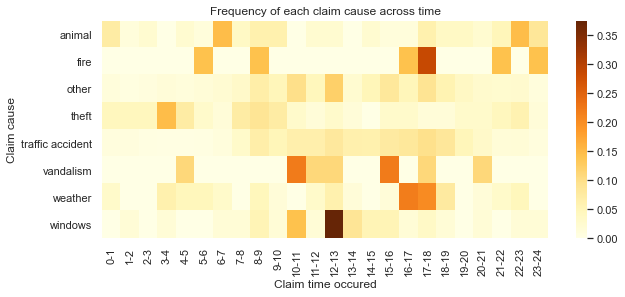

In [563]:
ax = sns.heatmap(tab[ord_lbl], cmap = 'YlOrBr')
ax.set_ylabel('Claim cause')
ax.set_xlabel('Claim time occured')
ax.set_title('Frequency of each claim cause across time')
fig = ax.get_figure()
fig.set_size_inches(10, 4)
plt.show()

fig.savefig('freq_claim_cause_across_time.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>Age-related features</font>**

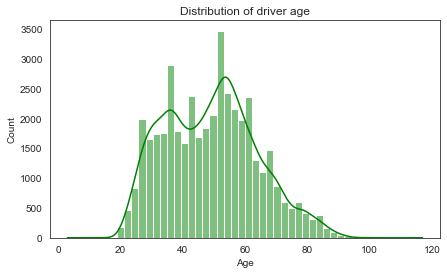

In [412]:
# histogram for driver age
sns.set_style('white')
ax = sns.histplot(x = 'driver_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of driver age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_driver_age.png', bbox_inches = 'tight', dpi = 300)

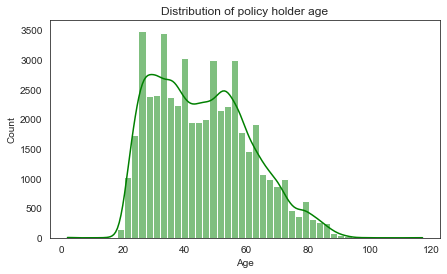

In [72]:
# histogram for policy_holder_age
sns.set_style('white')
ax = sns.histplot(x = 'policy_holder_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of policy holder age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_policy_holder_age.png', bbox_inches = 'tight', dpi = 300)

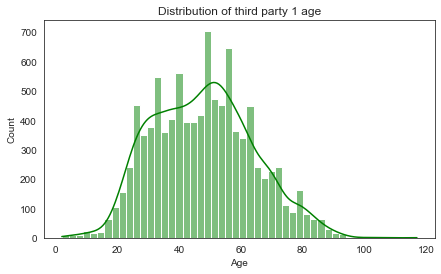

In [73]:
# histogram for third_party_age
sns.set_style('white')
ax = sns.histplot(x = 'third_party_1_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of third party 1 age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_third_party_1_age.png', bbox_inches = 'tight', dpi = 300)

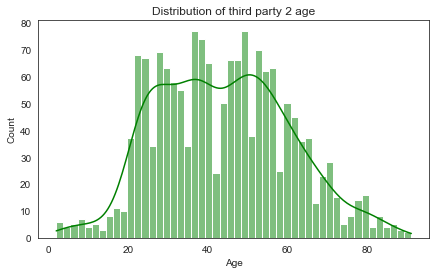

In [74]:
# histogram for third_party_age
sns.set_style('white')
ax = sns.histplot(x = 'third_party_2_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of third party 2 age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_third_party_2_age.png', bbox_inches = 'tight', dpi = 300)

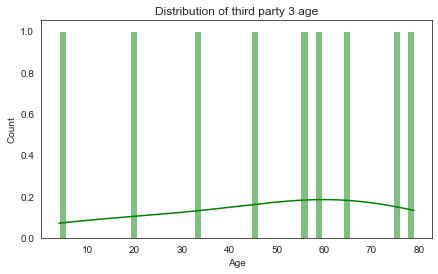

In [75]:
# histogram for third_party_age
sns.set_style('white')
ax = sns.histplot(x = 'third_party_3_age', data = data, kde = True, 
                  color = 'green',  bins = 50)
ax.set_title('Distribution of third party 3 age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_third_party_3_age.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>Policy Coverage</font>**
 - <font color='blue'> *policy_coverage_1000* consists of quite many missing values. So, we disuss it in a separate section.</font>

count    27043.000000
mean        21.537255
std         10.824431
min          1.000000
25%         14.000000
50%         19.000000
75%         26.000000
max        148.000000
Name: policy_coverage_1000, dtype: float64


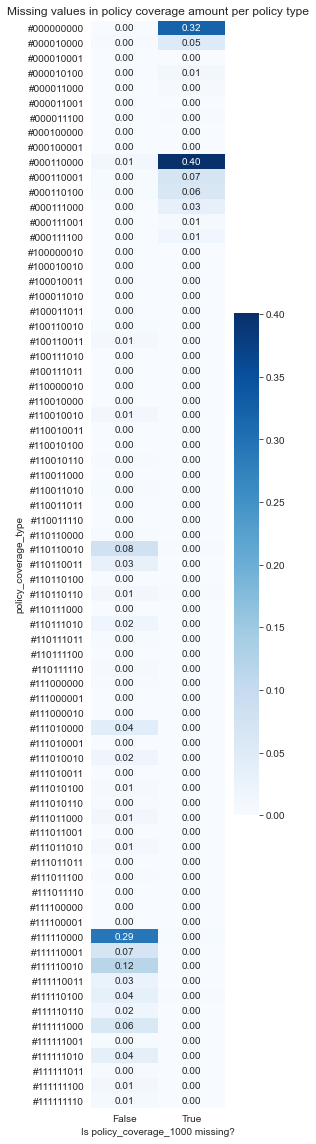

In [111]:
# Distribution of policy_coverage_1000
print(data['policy_coverage_1000'].describe())

# 2-ways frequency table for policy_coverage_1000 and policy_coverage_type
table_policy_coverage = pd.crosstab(data['policy_coverage_type'], 
                  data['policy_coverage_1000'].isna(), normalize = 'columns')
# heatmap
ax = sns.heatmap(table_policy_coverage, annot = True, fmt = '.2f',
                 yticklabels = True, cmap = 'Blues')
ax.set_title('Missing values in policy coverage amount per policy type')
ax.set_xlabel('Is policy_coverage_1000 missing?')
fig = ax.get_figure()
fig.set_size_inches(3, 20)
fig.savefig('dist_policy_coverage.png', bbox_inches = 'tight', dpi = 300)

In [185]:
# For policy_coverage_type, only these postal codes are included. Remaining types are categorized as 'other'
data[data['fraud'] == 'Y']['policy_coverage_type'].value_counts().head(21)

#111110000    56
#000110000    38
#000000000    38
#111110001    25
#110110010    20
#111110010    17
#111110100    13
#110110011    11
#111111000    10
#111110011    10
#000110001     7
#000010000     6
#111010000     6
#110010010     4
#110111010     4
#111111010     4
#000110100     3
#111000000     3
#111010010     3
#000111000     3
#111011000     3
Name: policy_coverage_type, dtype: int64

In [232]:
data.sample(1)['policy_coverage_type'].values 

array(['#110010011'], dtype=object)

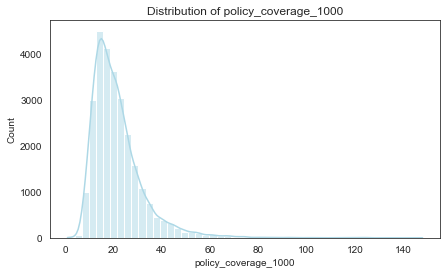

In [223]:
# heatmap
ax = sns.histplot(x = 'policy_coverage_1000', data = data, kde = True, 
                  color = 'lightblue',  bins = 50)
ax.set_title('Distribution of policy_coverage_1000')
ax.set_xlabel('policy_coverage_1000')
fig = ax.get_figure()
fig.set_size_inches(7, 4)
fig.savefig('dist_policy_coverage_1000.png', bbox_inches = 'tight', dpi = 300)

 **<font color='blue'>Distributions of Postal code</font>**

In [139]:
# Count of postal code
print(data['claim_postal_code'].value_counts().index.shape,
    data['policy_holder_postal_code'].value_counts().index.shape,
    data['driver_postal_code'].value_counts().index.shape,
    data['third_party_1_postal_code'].value_counts().index.shape,
    data['third_party_2_postal_code'].value_counts().index.shape,
    data['third_party_3_postal_code'].value_counts().index.shape,
    data['repair_postal_code'].value_counts().index.shape)

(1060,) (1082,) (1077,) (1088,) (750,) (27,) (754,)


In [33]:
data.head()

,claim_id,claim_alcohol,claim_amount,claim_cause,claim_language,claim_liable,claim_num_injured,claim_num_third_parties,claim_num_vehicles,claim_police,claim_postal_code,claim_time_occured,claim_vehicle_brand,claim_vehicle_cyl,claim_vehicle_fuel_type,claim_vehicle_id_known,claim_vehicle_load,claim_vehicle_power,claim_vehicle_type,days_before_occured,days_before_registered,driver_age,driver_country,driver_expert_id_known,driver_form,driver_injured,driver_postal_code,fraud,policy_claim_length,policy_coverage_1000,policy_coverage_type,policy_holder_age,policy_holder_country,policy_holder_expert_id_known,policy_holder_form,policy_holder_postal_code,policy_length,policy_num_changes,policy_num_claims,policy_premium_100,repair_age,repair_country,repair_form,repair_id_known,repair_postal_code,repair_sla,third_party_1_age,third_party_1_country,third_party_1_expert_id_known,third_party_1_form,third_party_1_id_known,third_party_1_injured,third_party_1_postal_code,third_party_1_vehicle_id_known,third_party_1_vehicle_type,third_party_2_age,third_party_2_country,third_party_2_expert_id_known,third_party_2_form,third_party_2_id_known,third_party_2_injured,third_party_2_postal_code,third_party_2_vehicle_id_known,third_party_2_vehicle_type,third_party_3_age,third_party_3_country,third_party_3_expert_id_known,third_party_3_form,third_party_3_id_known,third_party_3_injured,third_party_3_postal_code,third_party_3_vehicle_id_known,third_party_3_vehicle_type
0,10000,unknown,4895.00,traffic accident,2,Y,1,1,2,Y,2018,unknown,unknown,998.0,1,1,1.25,51.0,car,3225.0,3,35.0,B,0,F,N,2660,N,93.0,NaN,#000111000,35.0,B,0,F,2660,365.0,1,0,4.0,NaN,unknown,unknown,0,unknown,N,58.0,B,0,F,1,Y,9120,1,car,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown
1,10001,unknown,3249.81,traffic accident,2,N,0,0,1,N,8820,unknown,unknown,NaN,1,0,NaN,NaN,car,1056.0,9,30.0,B,0,M,N,1730,N,NaN,NaN,#000000000,30.0,B,0,M,1730,NaN,0,0,NaN,NaN,B,C,1,1861,Y,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown
2,10002,unknown,3242.89,traffic accident,2,Y,0,1,2,N,1831,unknown,TOYOTA,3000.0,1,1,3.30,175.0,van,4593.0,4,45.0,B,0,M,N,9200,N,94.0,58.0,#111110000,45.0,B,0,M,9200,3653.0,0,0,20.0,NaN,unknown,unknown,0,unknown,N,NaN,B,0,C,1,N,8510,1,car,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown
3,10003,unknown,2687.00,traffic accident,2,Y,0,1,3,N,2610,unknown,PEUGEOT,1868.0,2,1,1.59,51.0,car,6054.0,4,71.0,B,0,M,N,2610,N,216.0,NaN,#000110000,71.0,B,0,M,2610,6940.0,0,8,4.0,NaN,unknown,unknown,0,unknown,N,NaN,B,1,C,1,N,2845,1,car,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown
4,10004,unknown,2084.45,traffic accident,1,Y,0,1,3,N,1210,unknown,MITSUBISHI,1499.0,1,1,1.46,80.0,car,3041.0,3,59.0,B,0,M,N,7340,N,215.0,15.0,#111110110,32.0,B,0,F,7340,4018.0,0,9,19.0,NaN,unknown,unknown,0,unknown,N,NaN,B,0,M,1,N,7340,1,car,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown,NaN,unknown,0,unknown,0,unknown,unknown,0,unknown


 **<font color='blue'>Overview of missing data</font>**
 - <font color='blue'>After data cleaning, some missing values are treated as an individual category called "unknown". The variables which have the highest proportion of missing value are age factors, more than 80% are missing.</font>
 - <font color='blue'>Apart from age, the variable *policy_coverage_1000* has about 50% missing observations.</font>
 - <font color='blue'>For other variables, there are about 10% to 20% of data are missing.</font>

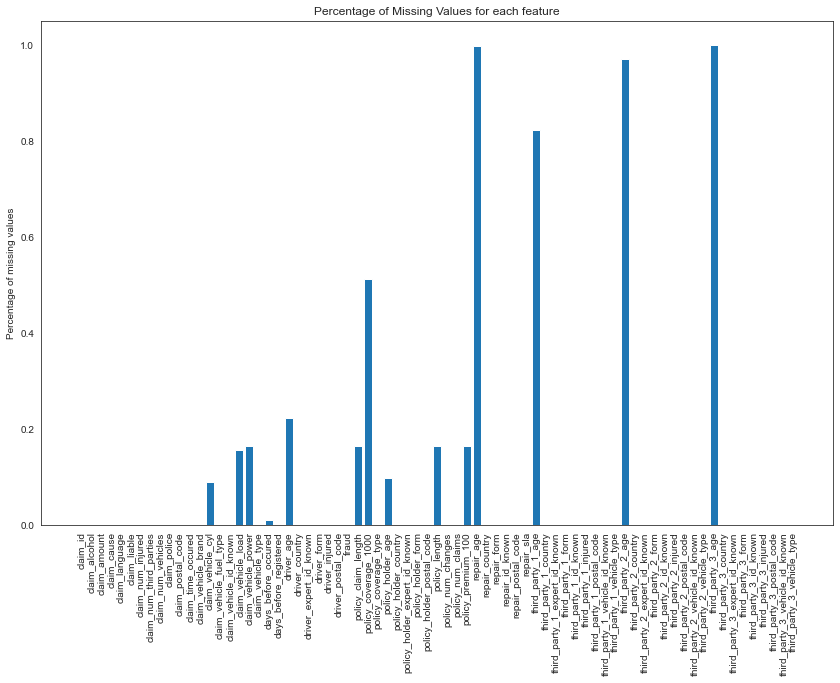

In [6]:
# Missing value in percentage
missing = pd.DataFrame(data.isna().sum()).T
missing /= data.shape[0]
missing

# Barplot for missing values
plt.rcParams['figure.figsize'] = [11, 7]
labels = missing.columns.tolist()
x = np.arange(len(labels))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x, missing.values.tolist()[0])
plt.xticks(x + 0.5, labels)
ax.set_xticklabels(labels, rotation = 90, ha = 'right');
ax.set_ylabel('Percentage of missing values');
ax.set_title('Percentage of Missing Values for each feature');

 **<font color='blue'>Weight of evidence coding</font>**

 **<font color='blue'>claim_postal_code</font>**

In [586]:
# A function to calculate information value
def get_information_value(data, features):
    tab = pd.crosstab(data[features], data['fraud'])
    tab['all'] = tab[['Y', 'N']].sum(axis = 1) 
    tab['share'] = tab['all'] / tab['all'].sum(axis = 0)
    tab['Y_rate'] = tab['Y'] / tab['all']
    tab['N_dist'] = tab['N'] / tab['N'].sum()
    tab['Y_dist'] = tab['Y'] / tab['Y'].sum()
    tab['WoE'] = np.log(tab['N_dist'] / tab['Y_dist'])
    tab = tab.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    tab['IV'] = tab['WoE'] * (tab['N_dist'] - tab['Y_dist'])
    return tab

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


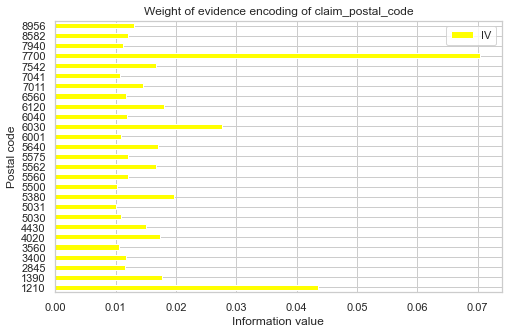

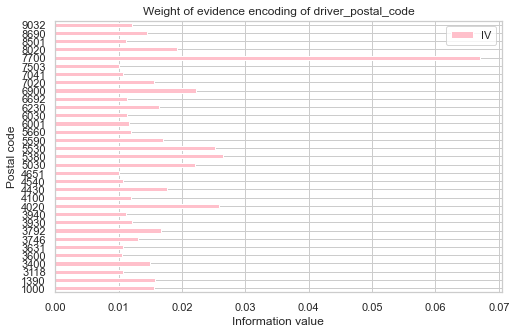

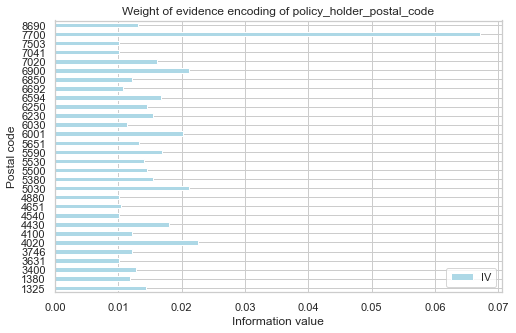

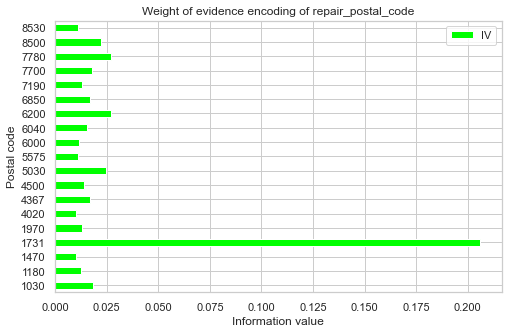

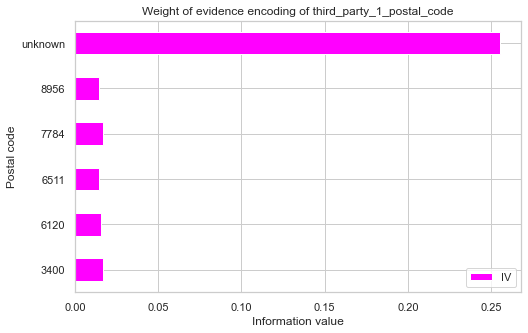

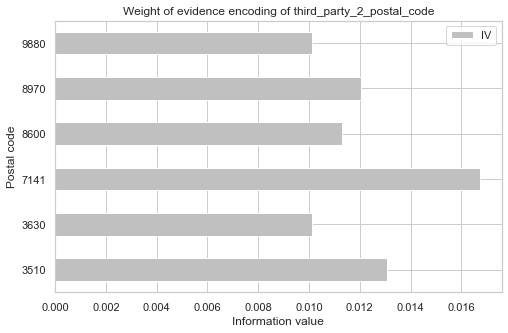

In [604]:
color_list = ['yellow', 'pink', 'lightblue', 'lime', 'magenta', 'silver']
for i, name in enumerate(data.columns[data.columns.str.endswith('_postal_code')].values[:-1]):
    postal_code_name = name
    tab = get_information_value(data, postal_code_name)
    tab[np.abs(tab['IV']) > 0.01].index.values
    ax = tab[np.abs(tab['IV']) > 0.01].plot.barh(y = 'IV', color = color_list[i])
    ax.set_xlabel('Information value')
    ax.set_ylabel('Postal code')
    ax.set_title('Weight of evidence encoding of ' + postal_code_name)
    fig = ax.get_figure()
    fig.set_size_inches(8, 5)
    fig.savefig('info_val_' + postal_code_name + '.png', bbox_inches = 'tight', dpi = 300)

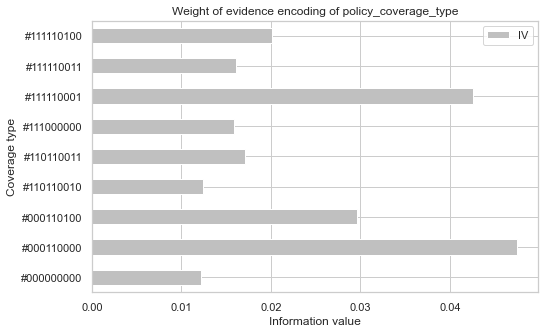

In [606]:
coverage_type_name = 'policy_coverage_type'
tab = get_information_value(data, coverage_type_name)
tab[np.abs(tab['IV']) > 0.01].index.values
ax = tab[np.abs(tab['IV']) > 0.01].plot.barh(y = 'IV', color = color_list[i])
ax.set_xlabel('Information value')
ax.set_ylabel('Coverage type')
ax.set_title('Weight of evidence encoding of ' + coverage_type_name)
fig = ax.get_figure()
fig.set_size_inches(8, 5)
fig.savefig('info_val_' + coverage_type_name + '.png', bbox_inches = 'tight', dpi = 300)

In [609]:
tab

fraud,N,Y,all,share,Y_rate,N_dist,Y_dist,WoE,IV
policy_coverage_type,,,,,,,,,
#000000000,9113,38,9151,0.164993,0.004153,0.165225,0.123377,0.292068,0.012223
#000010000,1514,6,1520,0.027406,0.003947,0.027450,0.019481,0.342948,0.002733
#000010001,32,0,32,0.000577,0.000000,0.000580,0.000000,0.000000,0.000000
#000010100,334,1,335,0.006040,0.002985,0.006056,0.003247,0.623338,0.001751
#000011000,137,1,138,0.002488,0.007246,0.002484,0.003247,-0.267822,0.000204
#000011001,4,0,4,0.000072,0.000000,0.000073,0.000000,0.000000,0.000000
#000011100,68,1,69,0.001244,0.014493,0.001233,0.003247,-0.968295,0.001950
#000100000,2,0,2,0.000036,0.000000,0.000036,0.000000,0.000000,0.000000
#000100001,1,0,1,0.000018,0.000000,0.000018,0.000000,0.000000,0.000000


 **<font color='blue'>Summary statistics for continuous variables</font>**

In [625]:
cont_features = data.columns[data.dtypes != np.dtype('O')]
cont_features = cont_features[~cont_features.str.endswith('_id_known')]
cont_features = cont_features[~cont_features.str.endswith('_id')]
cont_features = cont_features[~cont_features.str.endswith('_postal_code')]

In [626]:
data[cont_features].describe()

,claim_amount,claim_num_injured,claim_num_third_parties,claim_num_vehicles,claim_vehicle_cyl,claim_vehicle_load,claim_vehicle_power,days_before_occured,days_before_registered,driver_age,policy_claim_length,policy_coverage_1000,policy_holder_age,policy_length,policy_num_changes,policy_num_claims,policy_premium_100,repair_age,third_party_1_age,third_party_2_age,third_party_3_age
count,55463.000000,55463.000000,55463.000000,55463.000000,50546.000000,46846.000000,46315.000000,54849.000000,55463.000000,43097.000000,46312.000000,27043.000000,50082.000000,46312.000000,55463.000000,55463.000000,46301.000000,89.000000,9870.000000,1621.000000,9.000000
mean,2110.099976,0.072030,0.831419,2.408489,1579.646283,1.927318,78.681485,3023.123703,17.197429,49.026429,170.191419,21.537255,45.673016,3357.954137,0.425076,2.034491,7.947625,47.629213,47.730598,43.863048,48.222222
std,1951.981619,0.314657,0.580161,0.918571,569.124114,2.343768,27.994627,1838.888101,64.288672,14.897457,116.217641,10.824431,15.516380,4593.065087,0.947263,2.570084,4.236660,12.475778,16.253310,16.532489,25.380986
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,37.000000,0.000000,3.000000,-2444.000000,1.000000,2.000000,61.000000,0.000000,0.000000,1.000000,19.000000,2.000000,2.000000,4.000000
25%,1061.230000,0.000000,1.000000,2.000000,1360.000000,1.610000,59.000000,1557.000000,3.000000,37.000000,79.000000,14.000000,33.000000,731.000000,0.000000,0.000000,4.000000,40.000000,35.000000,31.000000,33.000000
50%,1581.210000,0.000000,1.000000,2.000000,1587.000000,1.850000,76.000000,2566.000000,5.000000,49.000000,174.000000,19.000000,44.000000,1826.000000,0.000000,1.000000,7.000000,49.000000,48.000000,43.000000,56.000000
75%,2450.100000,0.000000,1.000000,3.000000,1968.000000,2.070000,91.000000,4083.000000,11.000000,59.000000,264.000000,26.000000,57.000000,3653.000000,0.000000,3.000000,10.000000,56.000000,59.000000,55.000000,65.000000
max,16901.000000,5.000000,5.000000,5.000000,3000.000000,500.000000,426.000000,20147.000000,2671.000000,117.000000,1630.000000,148.000000,117.000000,24441.000000,10.000000,10.000000,71.000000,82.000000,117.000000,91.000000,79.000000


 **<font color='blue'>Correlation analysis with continuous variables</font>**
 - <font color='blue'>*claim_vehicle_cyl* is highly correlated with *claim_vehicle_power* and *policy_coverage_1000*.</font>
 - <font color='blue'>*policy_coverage_1000* is also highly correlated with *claim_vehicle_power*.</font>
 - <font color='blue'>*policy_holder_age* is also highly correlated with *driver_age*.</font>

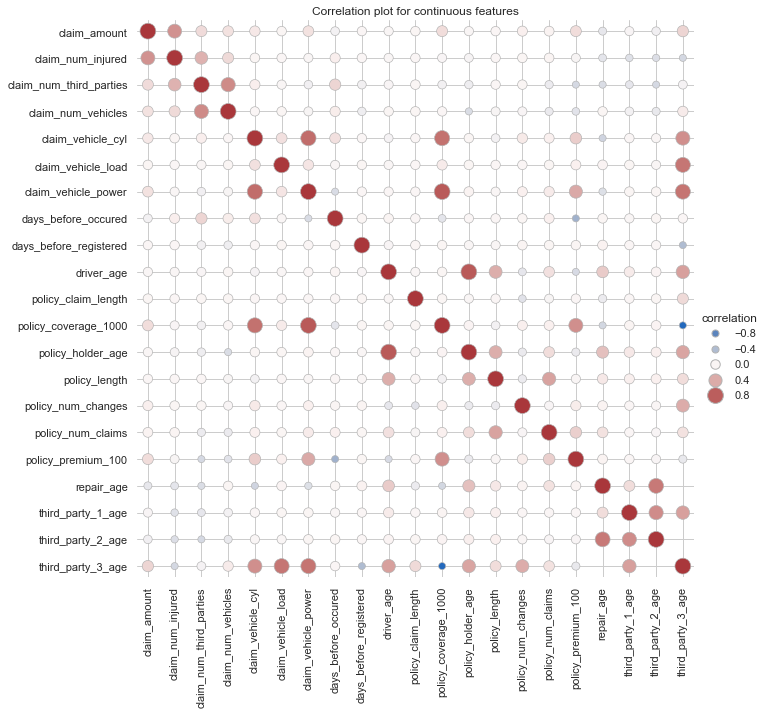

In [628]:
data_cont = data[cont_features]
# Unfold correlation matrix, and create correlation plot
corr_mat = data_cont.corr().stack().reset_index(name = 'correlation')
ax = sns.relplot(data = corr_mat,
    x = 'level_0', y = 'level_1', hue = 'correlation', size = 'correlation',
    palette = 'vlag', hue_norm = (-1, 1), edgecolor = '.7',
    height = 10, sizes = (50, 250), size_norm = (-.2, .8))

# Tweak the figure to finalize
ax.set(xlabel = '', ylabel = '', aspect = 'equal', title = 'Correlation plot for continuous features')
ax.despine(left = True, bottom = True)
ax.ax.margins(.02)
for label in ax.ax.get_xticklabels():
    label.set_rotation(90)
for artist in ax.legend.legendHandles:
    artist.set_edgecolor('.7')
            
ax.savefig('corr_plot.png', bbox_inches = 'tight', dpi = 300)

In [651]:
data_cat = data.drop(cont_features.to_list() + ['claim_id'], axis = 1).columns
data_cat = data_cat[~data_cat.str.endswith('postal_code')]
data_cat = data_cat.drop(['claim_vehicle_brand', 'claim_time_occured', 'claim_cause', 'policy_coverage_type'])

KeyboardInterrupt: 

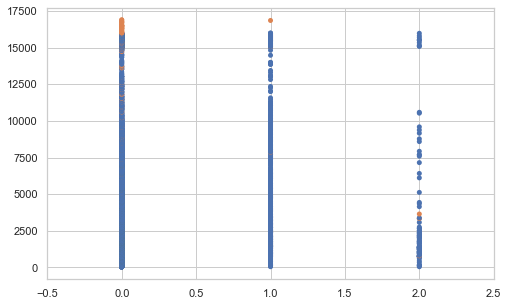

In [659]:
fig, axes = plt.subplots(figsize = (8, 5))
for i , name in enumerate(data_cat):
    sns.swarmplot(x = name, y = 'claim_amount', hue = 'fraud', data = data)

KeyboardInterrupt: 

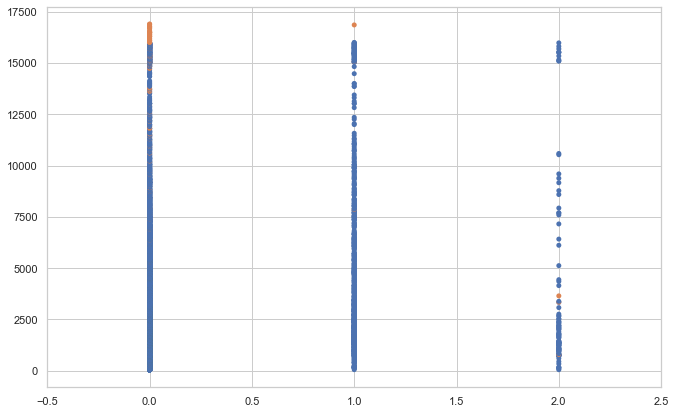

In [660]:
sns.swarmplot(x = data_cat[0], y = 'claim_amount', hue = 'fraud', data = data)

In [662]:
data_cat[0]

'claim_alcohol'